<a href="https://colab.research.google.com/github/vishwaayush/C-lab/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk

In [61]:
data = pd.read_csv('sentiment analysis.csv', encoding='ISO-8859-1')
data.rename(columns={'0': 'label'}, inplace=True)

In [5]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
42367,0,1676064993,Fri May 01 21:00:32 PDT 2009,NO_QUERY,lovehaightpeace,I wish Eric Draven was real.
42368,0,1676065032,Fri May 01 21:00:32 PDT 2009,NO_QUERY,bhillss,exam time
42369,0,1676065247,Fri May 01 21:00:34 PDT 2009,NO_QUERY,OxCheliJoxO,is gettin sick! Damn! Go figure I have big wee...
42370,0,1676065305,Fri May 01 21:00:35 PDT 2009,NO_QUERY,exeromai,Had to leave after shooting 1st 3 songs of Dea...
42371,0,1676065473,Fri May 01 21:00:36 PDT 2009,NO_QUERY,trslove,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   0                                                                                                                    42372 non-null  int64 
 1   1467810369                                                                                                           42372 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         42372 non-null  object
 3   NO_QUERY                                                                                                             42372 non-null  object
 4   _TheSpecialOne_  

In [8]:
data.shape

(42372, 6)

In [9]:
data.describe()

,0,1467810369
count,42372.0,4.237200e+04
mean,0.0,1.543803e+09
std,0.0,4.121128e+07
min,0.0,1.467811e+09
25%,0.0,1.550986e+09
50%,0.0,1.557230e+09
75%,0.0,1.564098e+09
max,0.0,1.676065e+09


In [35]:
def pattern_remove(in_text,in_pattern):
  a = re.findall(in_pattern, in_text)
  for characters in a:
    in_text = re.sub(characters, "", in_text)
  return in_text

In [36]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [37]:
data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
42367,0,1676064993,Fri May 01 21:00:32 PDT 2009,NO_QUERY,lovehaightpeace,I wish Eric Draven was real.
42368,0,1676065032,Fri May 01 21:00:32 PDT 2009,NO_QUERY,bhillss,exam time
42369,0,1676065247,Fri May 01 21:00:34 PDT 2009,NO_QUERY,OxCheliJoxO,is gettin sick! Damn! Go figure I have big wee...
42370,0,1676065305,Fri May 01 21:00:35 PDT 2009,NO_QUERY,exeromai,Had to leave after shooting 1st 3 songs of Dea...
42371,0,1676065473,Fri May 01 21:00:36 PDT 2009,NO_QUERY,trslove,NaN


In [40]:
print(data.columns)
tweet_column_name = '@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D'
data['new_tweet'] = [pattern_remove(str(tweet), "@[\w]*") if isinstance(tweet, str) else '' for tweet in data[tweet_column_name]]

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [41]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",new_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [42]:
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")

In [43]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",new_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [45]:
data['new_tweet'] = data['new_tweet'].apply(lambda b : " ".join([c for c in b.split() if len(c)>3]))

In [46]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",new_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that can't update Facebook texting it......
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball. Managed save rest bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",it's behaving all. mad. here? because can't ov...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [47]:
used_words = data['new_tweet'].apply(lambda b : b.split())
used_words.head()

,new_tweet
0,"[upset, that, can't, update, Facebook, texting..."
1,"[dived, many, times, ball., Managed, save, res..."
2,"[whole, body, feels, itchy, like, fire]"
3,"[it's, behaving, all., mad., here?, because, c..."
4,"[whole, crew]"


In [48]:
for i in range(len(used_words)):
  used_words[i] = " ".join(used_words[i])

data['new_tweet'] = used_words

In [49]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",new_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that can't update Facebook texting it......
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball. Managed save rest bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",it's behaving all. mad. here? because can't ov...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [50]:
freq_words = " ".join([words for words in data['new_tweet']])

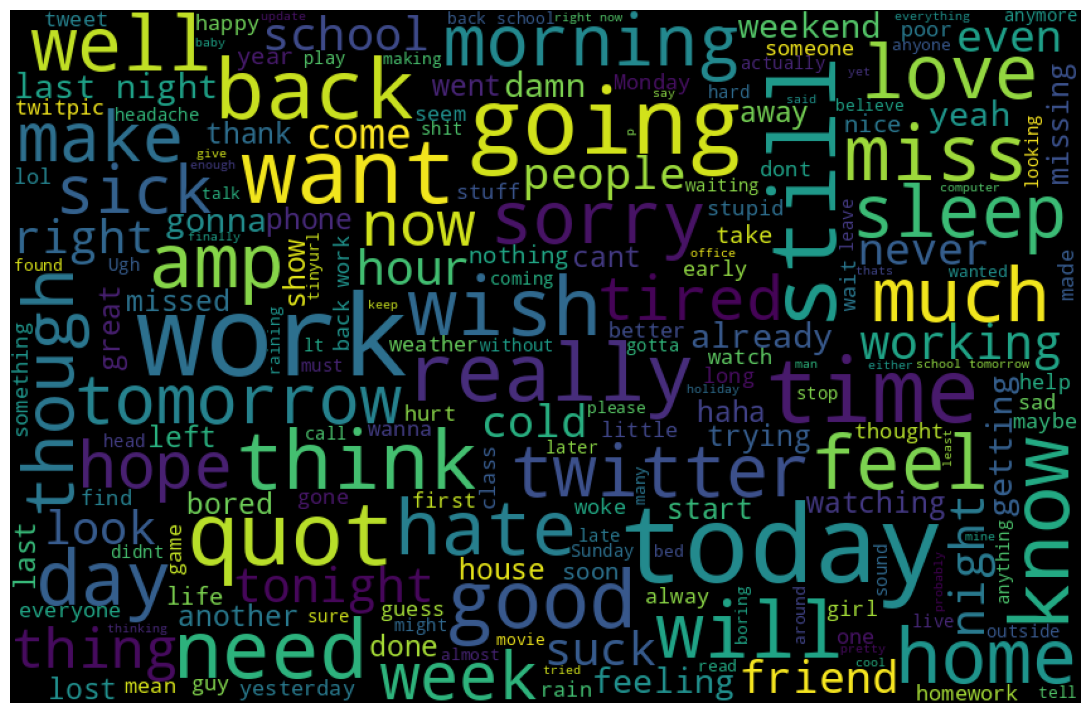

In [55]:
cloud_words = WordCloud(width=850, height=550, random_state=50,
                        max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_words)
plt.axis('off')
plt.show()

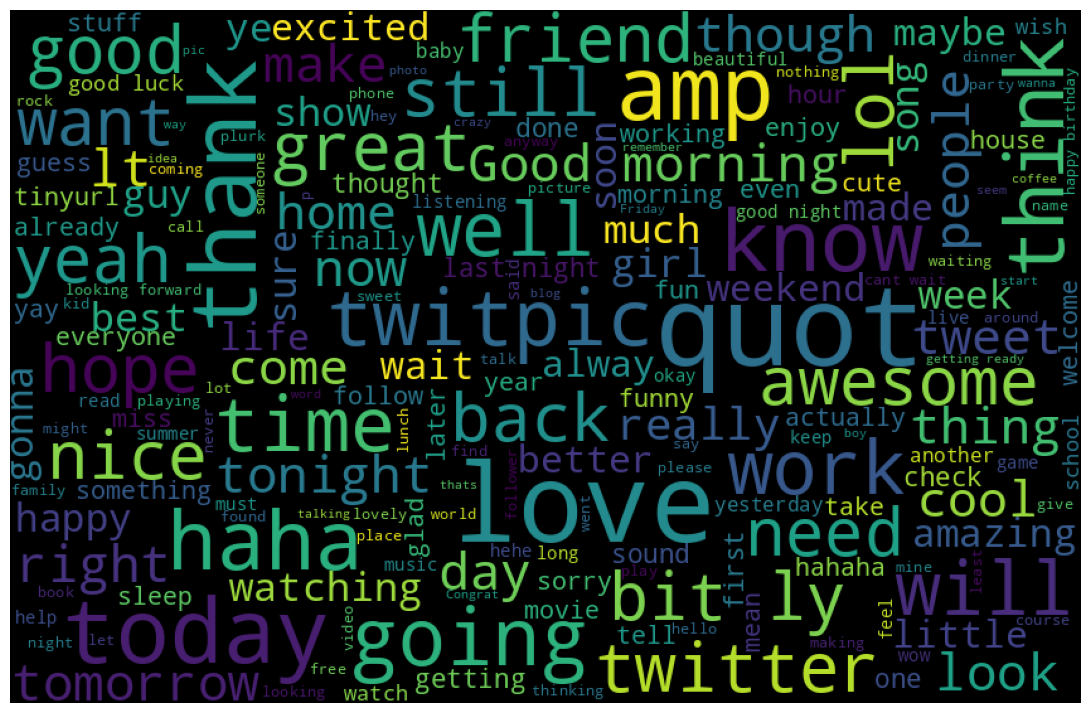

In [75]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==4]])

cloud_words = WordCloud(width=850, height=550, random_state=50,
                        max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_words)
plt.axis('off')
plt.show()

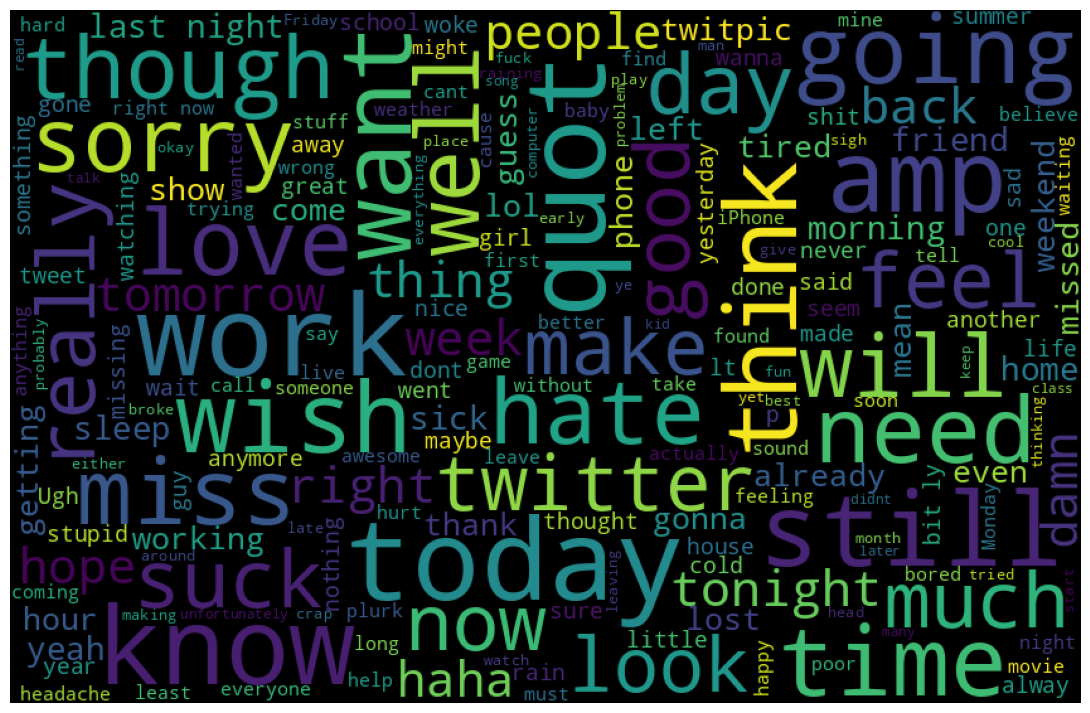

In [73]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==0]])

cloud_words = WordCloud(width=850, height=550, random_state=50,
                        max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_words)
plt.axis('off')
plt.show()

In [97]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    if isinstance(tweet, str):
      d = re.findall(r"#(\w+)", tweet)
      hash_tag.append(d)
    else:
      hash_tag.append([]) # Append an empty list for non-string entries
  return hash_tag

In [99]:
hashtag_negative = get_hashtag(data['new_tweet'][data['label']==0])

hashtag_positive = get_hashtag(data['new_tweet'][data['label']==4])

In [86]:
hashtag_negative[:5]

[[], [], [], [], []]

In [87]:
hashtag_positive[:5]

[[], [], [], [], []]

In [89]:
hashtag_positive = sum(hashtag_positive, [])
hashtag_negative = sum(hashtag_negative, [])

In [90]:
hashtag_positive[:5]

['Devunity', 'Alexa', 'Japan', 'Skype', 'expletives']

In [93]:
tweet_count = nltk.FreqDist(hashtag_positive)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count': list(tweet_count.values())})

In [94]:
e.head()

,name_hashtag,total_count
0,Devunity,1
1,Alexa,1
2,Japan,3
3,Skype,2
4,expletives,1


In [102]:
e = e.nlargest(columns='total_count', n=5)
fig = px.bar(e, x="name_hashtag",y="total_count",color="name_hashtag")
fig.show()

In [108]:
hashtag_negative[:10]

[[], [], [], [], [], [], [], [], [], []]

In [109]:
hashtag_negative_flat = sum(hashtag_negative, [])
tweet_count = nltk.FreqDist(hashtag_negative_flat)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count': list(tweet_count.values())})

In [110]:
e.head()

,name_hashtag,total_count
0,itm,2
1,therapyfail,1
2,TTSC,1
3,gayforpeavy,1
4,FML,12


In [112]:
e = e.nlargest(columns='total_count', n=10)
fig = px.bar(e, x="name_hashtag",y="total_count",color="name_hashtag")
fig.show()